In [2]:
import pandas as pd
from matplotlib import pyplot

In [3]:
df = pd.read_csv('grouped_data.csv', index_col=0)
df.drop(['WasRainingDuringRaceAnyTime'], axis=1, inplace=True)
df = df.loc[df['lapTireChange'].str.count(':') <= 3]
df['lapTireChange'] = df['lapTireChange'].str.replace('HYPERSOFT', 'SOFT').str.strip()
df['lapTireChange'] = df['lapTireChange'].str.replace('SUPERSOFT', 'SOFT').str.strip()
df['lapTireChange'] = df['lapTireChange'].str.replace('ULTRASOFT', 'SOFT').str.strip()

quali_result_corr = df[['startingGridPosition', 'position']]
quali_result_corr.corr(method='pearson')['position'].iloc[0]

df.drop(['position'], axis=1, inplace=True)
df.drop(['positionDiff'], axis=1, inplace=True)
df.drop(['raceId'], axis=1, inplace=True)
df.drop(['year'], axis=1, inplace=True)
df.drop(['raceName'], axis=1, inplace=True)
df

,driverCode,teamName,startingGridPosition,circuitName,AirTemp,Humidity,TrackTemp,WindSpeed,lapTireChange
15,ALO,McLaren,13,Bahrain International Circuit,28.0,46.4,33.5,1.5,"14: SOFT->MEDIUM, 39: MEDIUM->SOFT"
16,BOT,Mercedes,3,Bahrain International Circuit,28.0,46.4,33.5,1.5,20: SOFT->MEDIUM
17,ERI,Sauber,17,Bahrain International Circuit,28.0,46.4,33.5,1.5,23: SOFT->MEDIUM
18,GAS,Toro Rosso,5,Bahrain International Circuit,28.0,46.4,33.5,1.5,"15: SOFT->SOFT, 34: SOFT->SOFT"
19,GRO,Haas F1 Team,16,Bahrain International Circuit,28.0,46.4,33.5,1.5,"18: SOFT->SOFT, 30: SOFT->SOFT, 45: SOFT->SOFT"
...,...,...,...,...,...,...,...,...,...
1340,SAI,Ferrari,5,Yas Marina Circuit,25.6,53.5,33.0,0.7,19: SOFT->HARD
1341,STR,Aston Martin,13,Yas Marina Circuit,25.6,53.5,33.0,0.7,"21: MEDIUM->HARD, 52: HARD->SOFT"
1342,TSU,AlphaTauri,8,Yas Marina Circuit,25.6,53.5,33.0,0.7,"23: MEDIUM->HARD, 53: HARD->SOFT"
1343,VER,Red Bull,1,Yas Marina Circuit,25.6,53.5,33.0,0.7,"13: SOFT->HARD, 36: HARD->HARD, 53: HARD->SOFT"


In [4]:
factorizedDriverCode, driverCodeLabel = pd.factorize(df['driverCode'], sort=True)
factorizedTeamName, teamNameLabel = pd.factorize(df['teamName'], sort=True)
factorizedCircuitName, circuitNameLabel = pd.factorize(df['circuitName'], sort=True)
factorizedLapTireChange, lapTireChangeLabel = pd.factorize(df['lapTireChange'], sort=True, na_sentinel=3)
df['driverCode'] = factorizedDriverCode
df['teamName'] = factorizedTeamName
df['circuitName'] = factorizedCircuitName
df['lapTireChange'] = factorizedLapTireChange
df

,driverCode,teamName,startingGridPosition,circuitName,AirTemp,Humidity,TrackTemp,WindSpeed,lapTireChange
15,2,7,13,6,28.0,46.4,33.5,1.5,116
16,3,8,3,6,28.0,46.4,33.5,1.5,265
17,4,12,17,6,28.0,46.4,33.5,1.5,330
18,6,13,5,6,28.0,46.4,33.5,1.5,3
19,8,6,16,6,28.0,46.4,33.5,1.5,188
...,...,...,...,...,...,...,...,...,...
1340,25,4,5,24,25.6,53.5,33.0,0.7,193
1341,27,3,13,24,25.6,53.5,33.0,0.7,279
1342,28,1,8,24,25.6,53.5,33.0,0.7,325
1343,30,10,1,24,25.6,53.5,33.0,0.7,85


In [5]:
df.describe()

,driverCode,teamName,startingGridPosition,circuitName,AirTemp,Humidity,TrackTemp,WindSpeed,lapTireChange
count,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000
mean,16.750789,7.311251,10.033649,12.426919,23.635121,51.307676,37.952050,1.417666,302.219769
std,8.944504,4.204242,5.796453,7.127904,4.405347,14.703399,9.109017,0.981301,173.808670
min,0.000000,0.000000,0.000000,0.000000,15.500000,16.900000,18.200000,0.000000,0.000000
25%,9.000000,4.000000,5.000000,6.000000,20.400000,40.000000,30.600000,0.700000,147.000000
50%,18.000000,7.000000,10.000000,13.000000,23.200000,53.500000,37.300000,1.300000,318.000000
75%,24.000000,10.000000,15.000000,19.000000,27.600000,60.400000,43.900000,2.100000,447.500000
max,31.000000,14.000000,20.000000,24.000000,34.200000,95.500000,57.000000,5.300000,619.000000


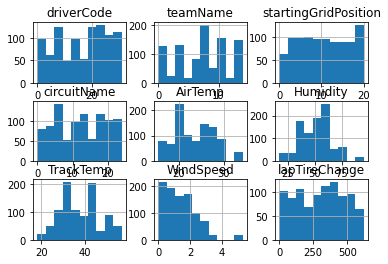

In [6]:
df.hist()
pyplot.show()

In [7]:
from sklearn.model_selection import train_test_split

array = df.values
X = array[:, 0:8]
y = array[:, 8:]
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.20, random_state=1)
y

array([[116.],
       [265.],
       [330.],
       [  3.],
       [188.],
       [382.],
       [271.],
       [136.],
       [530.],
       [ 98.],
       [131.],
       [614.],
       [148.],
       [314.],
       [ 22.],
       [ 20.],
       [187.],
       [255.],
       [ 67.],
       [319.],
       [246.],
       [350.],
       [254.],
       [457.],
       [255.],
       [137.],
       [338.],
       [467.],
       [511.],
       [244.],
       [337.],
       [555.],
       [147.],
       [ 97.],
       [204.],
       [318.],
       [ 40.],
       [619.],
       [488.],
       [165.],
       [117.],
       [387.],
       [256.],
       [147.],
       [519.],
       [133.],
       [547.],
       [133.],
       [133.],
       [133.],
       [418.],
       [133.],
       [404.],
       [133.],
       [  3.],
       [351.],
       [138.],
       [255.],
       [133.],
       [133.],
       [ 92.],
       [285.],
       [266.],
       [361.],
       [258.],
       [361.],
       [19

In [21]:
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

models = [('LR', LogisticRegression(solver='liblinear', multi_class='ovr')), ('LDA', LinearDiscriminantAnalysis()),
          ('KNN', KNeighborsClassifier()), ('CART', DecisionTreeClassifier()), ('NB', GaussianNB()),
          ('SVM', SVC(gamma='auto'))]
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

c:\develop\studies\licencjat\venv\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
c:\develop\studies\licencjat\venv\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\develop\studies\licencjat\venv\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\develop\studies\licencjat\venv\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = c

LR: 0.022368 (0.011842)
LDA: 0.034211 (0.015789)
KNN: 0.023684 (0.015345)


c:\develop\studies\licencjat\venv\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
c:\develop\studies\licencjat\venv\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\develop\studies\licencjat\venv\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\develop\studies\licencjat\venv\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = c

CART: 0.034211 (0.020553)


c:\develop\studies\licencjat\venv\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
c:\develop\studies\licencjat\venv\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\develop\studies\licencjat\venv\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\develop\studies\licencjat\venv\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = c

NB: 0.031579 (0.012059)


c:\develop\studies\licencjat\venv\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\develop\studies\licencjat\venv\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\develop\studies\licencjat\venv\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\develop\studies\licencjat\venv\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

SVM: 0.014474 (0.003947)


In [19]:
model = LinearDiscriminantAnalysis()
model.fit(X, y)
predictions = model.predict(X_validation)
predictions_df = pd.DataFrame(predictions, columns=['lapTireChangePredicted'])
predictions_df = predictions_df.round()
predictions_df.iloc[:, 0] = lapTireChangeLabel[predictions_df.iloc[:, 0].astype(int)]

y_validation_df = pd.DataFrame(y_validation, columns=['lapTireChangeValidation'])
y_validation_df.iloc[:, 0] = lapTireChangeLabel[y_validation_df.iloc[:, 0].astype(int)]
y_validation_df.join(predictions_df)

,lapTireChangeValidation,lapTireChangePredicted
0,"22: SOFT->MEDIUM, 46: MEDIUM->SOFT",22: SOFT->HARD
1,"8: HARD->MEDIUM, 47: MEDIUM->SOFT","1: nan->SOFT, 26: SOFT->SOFT"
2,"19: SOFT->MEDIUM, 41: MEDIUM->SOFT","1: nan->SOFT, 26: SOFT->SOFT"
3,"9: SOFT->MEDIUM, 27: MEDIUM->MEDIUM, 50: MEDIU...","24: SOFT->HARD, 45: HARD->MEDIUM"
4,"21: SOFT->MEDIUM, 42: MEDIUM->MEDIUM","25: MEDIUM->MEDIUM, 38: MEDIUM->SOFT"
...,...,...
186,"7: MEDIUM->MEDIUM, 8: MEDIUM->UNKNOWN, 34: MED...","2: MEDIUM->MEDIUM, 3: MEDIUM->MEDIUM, 41: MEDI..."
187,13: SOFT->HARD,"25: MEDIUM->HARD, 33: HARD->MEDIUM"
188,36: INTERMEDIATE->INTERMEDIATE,"19: SOFT->HARD, 42: HARD->MEDIUM"
189,"13: SOFT->MEDIUM, 32: MEDIUM->SOFT",26: HARD->MEDIUM
